In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def monthly_payment(n_periods, period_interest_rate, present_value, future_value=0):
    """
    Calculate monthly payment using Present/Future Value formula.
    time_years : float
        Loan or investment duration in years.
    annual_interest_rate : float
        Annual interest rate in percentage (e.g., 6 for 6%).
    present_value : float
        Present value (loan amount or investment).
    future_value : float, optional
        Future value at the end of the period (default 0).
    Returns
    -------
    float
        Monthly payment.
    """
    # Convert annual rate to monthly decimal rate
    r = period_interest_rate
    n = n_periods

    if r == 0:
        # No interest case
        return (present_value + future_value) / n

    # Payment formula
    pmt = (r * (present_value + future_value / ((1 + r) ** n))) / (1 - (1 + r) ** -n)

    lifetime_pmt = n_periods*pmt
    lifetime_yield = (lifetime_pmt-present_value)/present_value
    
    # print(f'Lifetime Payment: {lifetime_pmt}'
    print(f'Period Payment: {round(pmt, 2)}')
    print(f'Total Periods: {n_periods}')
    print(f'Yearly Payment: {round(pmt*12, 2)}')
    print(f'Lifetime Payment if Paid every Month: {round(lifetime_pmt, 2)}')    
    print(f'Lifetime Yield: {round(lifetime_yield*100, 2)}%')

    return pmt#, lifetime_pt, lifetime_yield





In [4]:
# If I have 500K and wish to buy a 400K home, how many months does it take to reach the 400K if I took out a 30 year loan and borrowed at 5%?

In [40]:
def generate_amortatized_loan(total_principal, n_periods, period_interest_rate,period_payment):
    df = pd.DataFrame(columns=['Period', 'Beginning_Principle', 'Payment', 'Interest_Rate'
                                                  , 'Paid_Interest', 'Paid_Principal'
                                                  , 'Ending_Principle','Total_Principal', 'Total_Interest'])
    period_counter = 0
    ending_balance = total_principal
    total_principal = 0
    total_interest = 0
    total_payment = 0 
    
    for p in range(n_periods):
        period_counter += 1
        beginning_balance = ending_balance
        payment = period_payment
        interest = period_interest_rate
        paid_interest = beginning_balance*interest
        paid_principal = payment-paid_interest
        ending_balance = beginning_balance-paid_principal
        
        total_principal += paid_principal
        total_interest += paid_interest
        total_payment += payment
        
        dic = {}
        dic['Beginning_Principle'] = [beginning_balance]
        dic['Period'] = [period_counter]
        dic['Payment'] = [payment]
        dic['Interest_Rate'] = [interest]
        dic['Paid_Interest'] = [paid_interest]
        dic['Paid_Principal'] = [paid_principal]
        dic['Ending_Principle'] = [ending_balance]
        dic['Total_Principal'] = [total_principal]
        dic['Total_Interest'] = [total_interest]
        dic['Total_Payment'] = [total_payment]
        df = pd.concat([df, pd.DataFrame(dic)])    
        # break
    return df

#### Generate Amortatized Loan

/tmp/ipykernel_2558435/475645900.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(dic)])


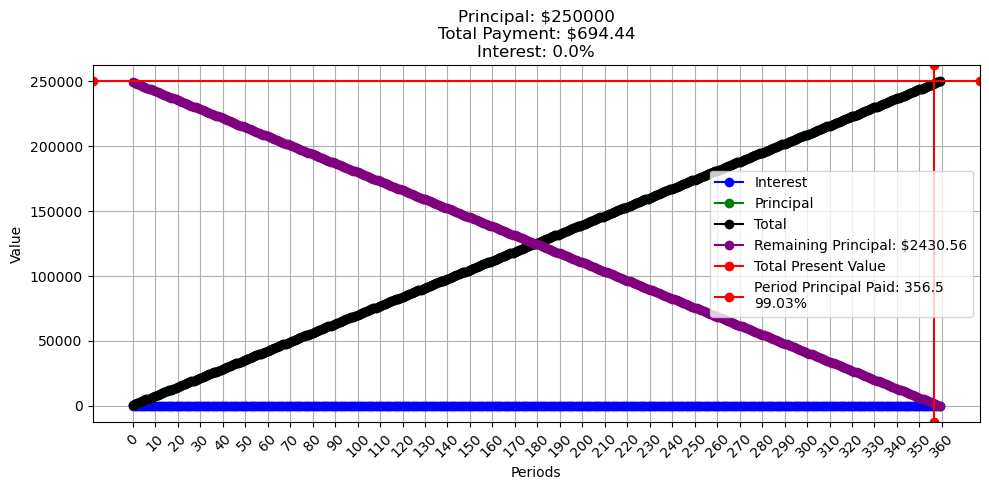

In [116]:


def generate_loan_table(principal = int(2.5e5), n_periods = 360, interest = 0.06): 
    period_interest_rate = interest/12
    period_payment = monthly_payment(n_periods=n_periods, period_interest_rate=period_interest_rate, present_value=principal, future_value=0)
    df = generate_amortatized_loan(principal, n_periods, period_interest_rate, period_payment)
    
    
    # Create a sample pandas Series
    data0 = df['Total_Interest'].reset_index(drop=True)
    data1 = df['Total_Principal'].reset_index(drop=True)
    data2 = df['Total_Payment'].reset_index(drop=True)
    data3 = df['Ending_Principle'].reset_index(drop=True)
                     # index=pd.date_range("2025-01-01", periods=7))
    
    period_principal_paid = (df[(abs(df['Total_Payment'] - principal)) < 5000]['Period'].median())
    period_principal_remaining = (df[(abs(df['Total_Payment'] - principal)) < 5000]['Ending_Principle'].median())
    
    
    # Plot the Series
    plt.figure(figsize=(10, 5))
    plt.plot(data0, marker='o', linestyle='-', color='blue', label='Interest')
    plt.plot(data1, marker='o', linestyle='-', color='green', label='Principal')
    plt.plot(data2, marker='o', linestyle='-', color='black', label='Total')
    plt.plot(data3, marker='o', linestyle='-', color='purple', label=f'Remaining Principal: ${round(period_principal_remaining, 2)}')
    plt.axhline(principal, marker='o', linestyle='-', color='red', label='Total Present Value')
    plt.axvline(period_principal_paid, marker='o', linestyle='-', color='red', label=f'Period Principal Paid: {period_principal_paid}\n{round(period_principal_paid*100/n_periods, 2)}%')
    
    
    # Add titles and labels
    plt.title(f"Principal: ${principal}\nTotal Payment: ${round(df['Payment'].iloc[0], 2)}\nInterest: {round(100*interest, 4)}%")
    plt.xlabel("Periods")
    plt.xticks([i for i in range(0, len(df)+10, 10)], rotation=45)
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



for rate in np.arange(0, 0.11, 0.01):
    generate_loan_table(principal = int(2.5e5), n_periods = 360, interest = rate)
    break

In [108]:
# df[(abs(df['Total_Payment'] - principal)) < 1000]['Period'].min()

In [96]:
# df